<a href="https://colab.research.google.com/github/Arunkarthi123/projects/blob/main/model_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Kaggle package
!pip install kaggle

# Upload your kaggle.json API token
from google.colab import files
files.upload()

# Move the API key to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d gurneetsingh1928/fire-smoke-dataset-combined

# Unzip the dataset
!unzip fire-smoke-dataset-combined.zip -d fire-smoke-data


Streaming output truncated to the last 5000 lines.
  inflating: fire-smoke-data/test/images/datacluster_000712.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000717.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000735.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000745.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000749.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000755.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000756.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000768.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000810.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000812.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000813.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000823.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000836.jpg  
  inflating: fire-smoke-data/test/images/datacluster_000838.jpg  
  inflating: fire-smoke-d

In [ ]:

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


# 6. Confusion Matrix

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fire', 'Smoke'], yticklabels=['Fire', 'Smoke'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



def classify_image(model, img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    return "Fire" if prediction[0][0]< 0.5 else "Smoke"


# 8. Visualize Sample Predictions

def visualize_predictions(model, image_paths, true_labels):
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img_array = np.array(img) / 255.0
        plt.subplot(3, 5, i + 1)
        plt.imshow(img_array)
        plt.axis('off')
        prediction = classify_image(model, img_path)
        plt.title(f'True: {true_labels[i]}, Pred: {prediction}')
    plt.tight_layout()
    plt.show()

def custom_data_generator(datagen, directory, target_size, batch_size):
    generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary'
    )
    while True:
        try:
            batch_x, batch_y = next(generator)  # Get the next batch of images
            yield batch_x, batch_y
        except OSError as e:
            print(f"Skipping corrupted image during training: {e}")
            continue  # Skip the corrupted image and move to the next batch



In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image



# Load the model from the .h5 file
model = load_model('/content/drive/MyDrive/projects/IS_Mini_project_1/fire_smoke_classification_model.h5')

# Now the model is loaded and can be used for inference, evaluation, or training


Found 209 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


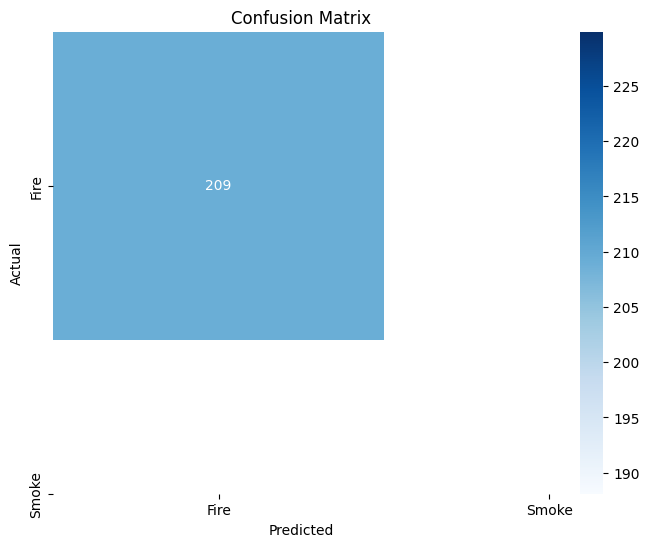

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction for the image: Fire
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


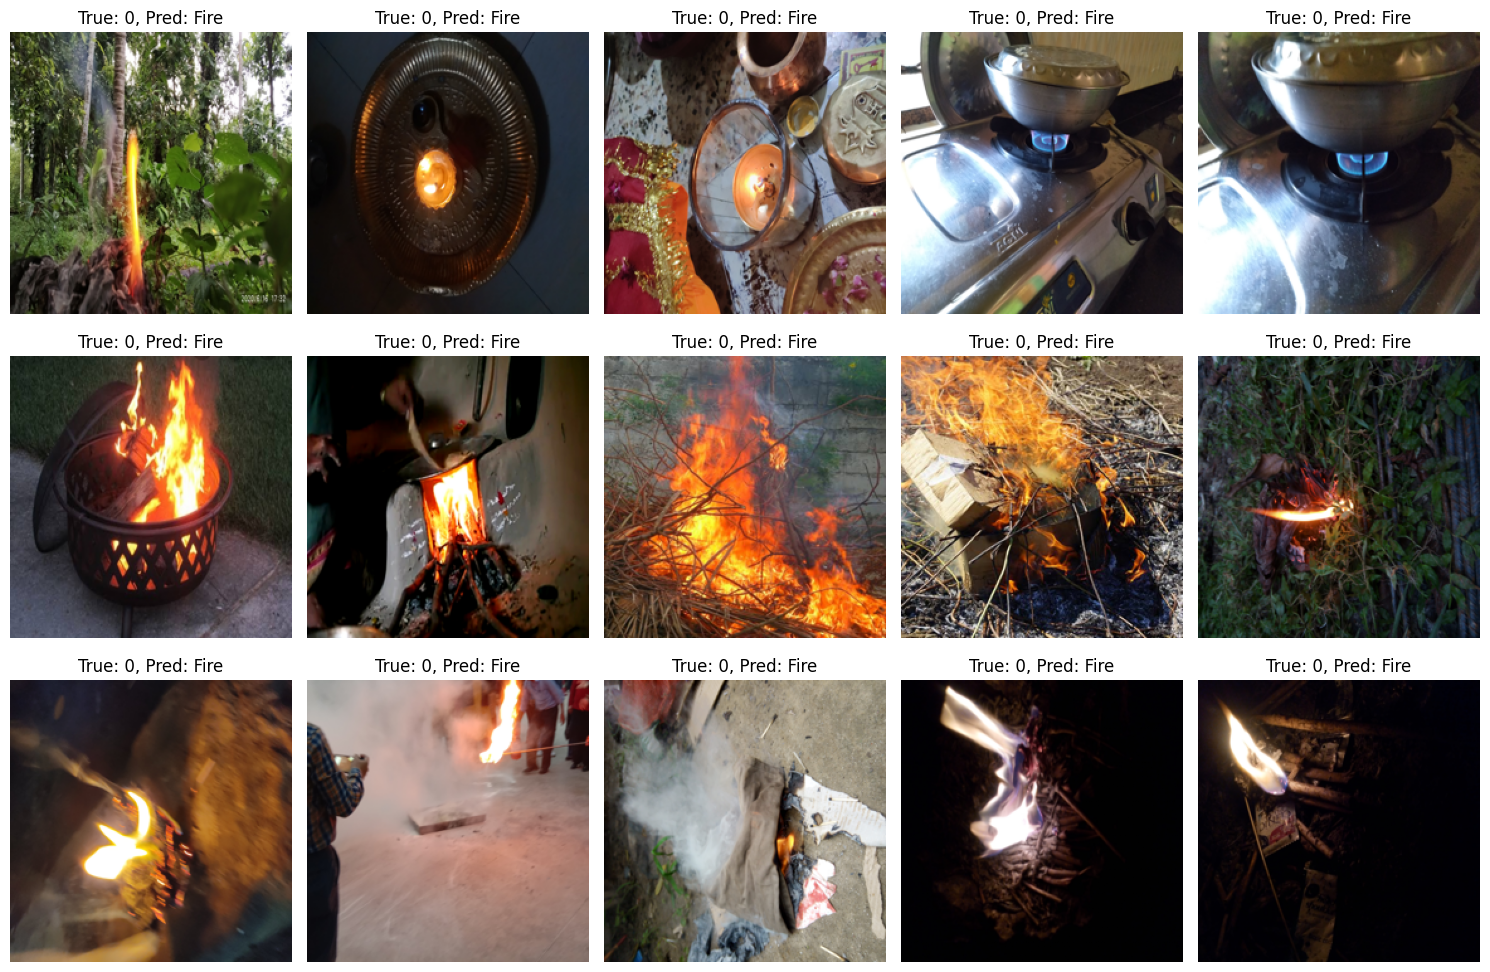

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/fire-smoke-data/train"
val_dir = "/content/fire-smoke-data/val"
test_dir = "/content/fire-smoke-data/test"


def custom_data_generator(datagen, directory, target_size=(224, 224), batch_size=32, class_mode='binary'):
    generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode,
        shuffle=False  # Ensure the order is not shuffled to match predictions
    )
    return generator
test_generator = custom_data_generator(ImageDataGenerator(rescale=1./255), test_dir, target_size=(224, 224), batch_size=32)
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype(int)
plot_confusion_matrix(y_true, y_pred)
user_image_path = "/content/fire-smoke-data/val/images/datacluster_000084.jpg"
result = classify_image(model, user_image_path)
print(f"Prediction for the image: {result}")

sample_image_paths = [test_generator.filepaths[i] for i in range(15)]
sample_labels = [test_generator.classes[i] for i in range(15)]
visualize_predictions(model, sample_image_paths, sample_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction for the image: Smoke


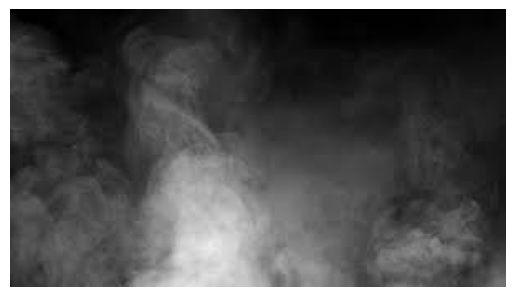

In [ ]:
user_image_path = "/content/smoke.jpeg"
result = classify_image(model, user_image_path)
print(f"Prediction for the image: {result}")

# Open the uploaded image
img = Image.open('/content/smoke.jpeg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide axes
plt.show()
user_image_path = "/content/smoke.jpeg"
result = classify_image(model, user_image_path)
print(f"Prediction for the image: {result}")

# Open the uploaded image
img = Image.open('/content/smoke.jpeg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide axes
plt.show()
user_image_path = "/content/smoke.jpeg"
result = classify_image(model, user_image_path)
print(f"Prediction for the image: {result}")

# Open the uploaded image
img = Image.open('/content/smoke.jpeg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide axes
plt.show()
user_image_path = "/content/smoke.jpeg"
result = classify_image(model, user_image_path)
print(f"Prediction for the image: {result}")

# Open the uploaded image
img = Image.open('/content/smoke.jpeg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide axes
plt.show()
user_image_path = "/content/smoke.jpeg"
result = classify_image(model, user_image_path)
print(f"Prediction for the image: {result}")

# Open the uploaded image
img = Image.open('/content/smoke.jpeg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide axes
plt.show()
user_image_path = "/content/smoke.jpeg"
result = classify_image(model, user_image_path)
print(f"Prediction for the image: {result}")

# Open the uploaded image
img = Image.open('/content/smoke.jpeg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide axes
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction for the image: Fire


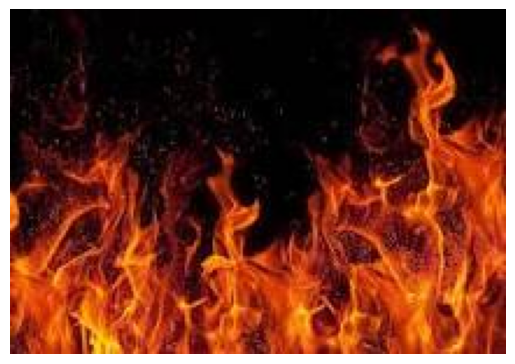

In [ ]:
user_image_path = "/content/fire.jpeg"
result = classify_image(model, user_image_path)
print(f"Prediction for the image: {result}")

# Open the uploaded image
img = Image.open('/content/fire.jpeg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide axes
plt.show()
